# 2.4 Logic for Model Selection

## Dataset split

train_test_split()

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target

# train with train_data
dt_clf.fit(train_data, train_label)

# predict with train_data
pred = dt_clf.predict(train_data)
print('Accuracy:',accuracy_score(train_label,pred))

Accuracy: 1.0


학습데이터로 훈련하고 학습데이터로 예측하면 정확도가 100% 가 나온다 >> y_train은 X_train과는 유사도가 적어야 모델의 성능을 객관적으로 판단할 수 있다. 

## Case 1 iris_data

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Accuracy: {0:.4f}'.format(accuracy_score(y_test,pred)))

Accuracy: 0.9556


## Case 2 iris_data.iloc[:, :] >> DataFrame

데이터 프레임을 split할때는 iloc으로 슬라이싱 해서 넣는다.

In [9]:
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], 
                                                    test_size=0.3, random_state=121)

In [13]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [18]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Accuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.9556


붓꽃데이터는 150개로 그렇게 크지 않아서 제대로 안쪼개면 성능이 안나온다. >> 테스트를 여러번 해볼 필요성이 있다.

교차검증은 학습데이터를 다시 학습데이터와 검증 데이터로 나눈다.

## 교차 검증

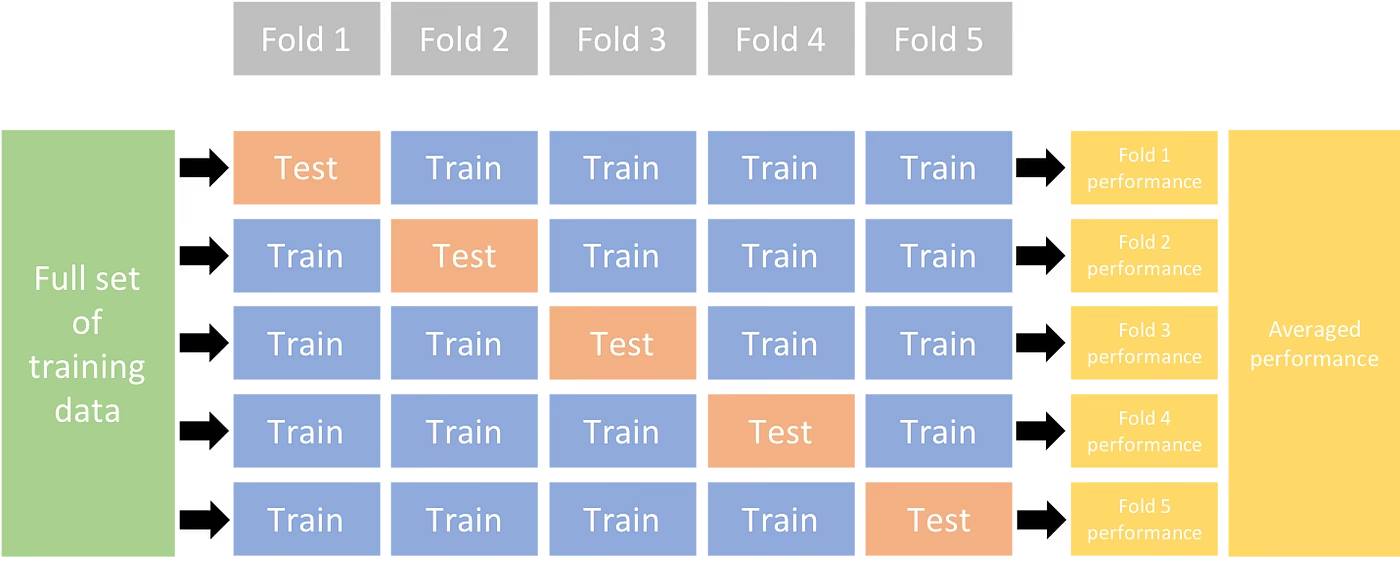

대표적인 교차검증법인 K-fold

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

# 4 / 5 = 120개의 훈련데이터 1 / 5 = 30 30개의 검증데이터

붓꽃 데이터 세트 크기: 150


In [22]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index in kfold.split(features): # for문은 5회동작 
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


kfold 자체가 한방에 계산해주는 함수는 아니고, for문으로 일단 pred 결과를 만들어 내어 사용자가 직접 평균을 내야한다.

- Stratified K fold

라벨을 균일하게 구성해서 kfold를 실행할 수 있다.

In [25]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [26]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


데이터 분포를 보면 학습은 1하고 2만 시켰는데 검증은 0으로 하고있다.
검증 정확도가 들쑥날쑥한 이유

In [27]:

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


차이점은 라벨이 들어간다. 라벨을 보고 쪼개줘야하기 때문
라벨이 균일하게 들어감

- cross_val_score()

교차검증을 보다 간편하게 실행한다.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
# for문 돌려 하던것을 한방에 해결
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- GridSearchCV

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [31]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)
# X_train을 서로 다른 파라미터로 3번 s_kfold를 실행 (총 18회)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.700000                5   
1  {'max_depth': 1, 'min_samples_split': 3}         0.700000                5   
2  {'max_depth': 2, 'min_samples_split': 2}         0.958333                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.958333                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.975000                1   
5  {'max_depth': 3, 'min_samples_split': 3}         0.975000                1   

   split0_test_score  split1_test_score  split2_test_score  
0              0.700                0.7               0.70  
1              0.700                0.7               0.70  
2              0.925                1.0               0.95  
3              0.925                1.0               0.95  
4              0.975                1.0               0.95  
5              0.975                1.0               0.95

In [36]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit = True로 설정된 GridSearchCV객체가 fit()을 수행 시 predict()를 통해
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도:  0.9667


In [37]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
